Implement a Variational Autoencoder (VAE) using TensorFlow/Keras. \\
Train on the dataset and generate new images. \\
Visualize the latent space.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE


In [ ]:

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

batch_size = 128
latent_dim = 2


In [ ]:

encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

encoder = models.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 14, 14, 32)     │            320 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 7, 7, 64)       │         18,496 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 3136)           │              0 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 2)              │          6,274 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 2)              │          6,274 │ flatten_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 31,364 (122.52 KB)

 Trainable params: 31,364 (122.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_12                  │ (None, 14, 14, 64)          │          36,928 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_13                  │ (None, 28, 28, 32)          │          18,464 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 28, 28, 1)           │             289 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

def vae_loss(y_true, y_pred, z_mean, z_log_var):

    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

    kl_loss = -0.5 * tf.reduce_mean(
        z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
    )

    return reconstruction_loss + kl_loss


In [ ]:

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
vae = models.Model(encoder_inputs, decoder(z), name="vae")


In [ ]:

class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):

        z_mean, z_log_var = self.encoder(inputs)


        z = sampling([z_mean, z_log_var])

        reconstructed = self.decoder(z)

        self.add_loss(vae_loss(inputs, reconstructed, z_mean, z_log_var))

        return reconstructed

vae = VAE(encoder, decoder)

vae.compile(optimizer='adam')


In [ ]:

history = vae.fit(x_train, epochs=50, batch_size=batch_size, validation_data=(x_test, None))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.3452 - val_loss: 0.2637
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2636 - val_loss: 0.2628
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2634 - val_loss: 0.2627
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2629 - val_loss: 0.2641
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2628 - val_loss: 0.2627
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2629 - val_loss: 0.2628
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2626 - val_loss: 0.2631
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2628 - val_loss: 0.2626
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2632 - val_loss: 0.2628
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/st

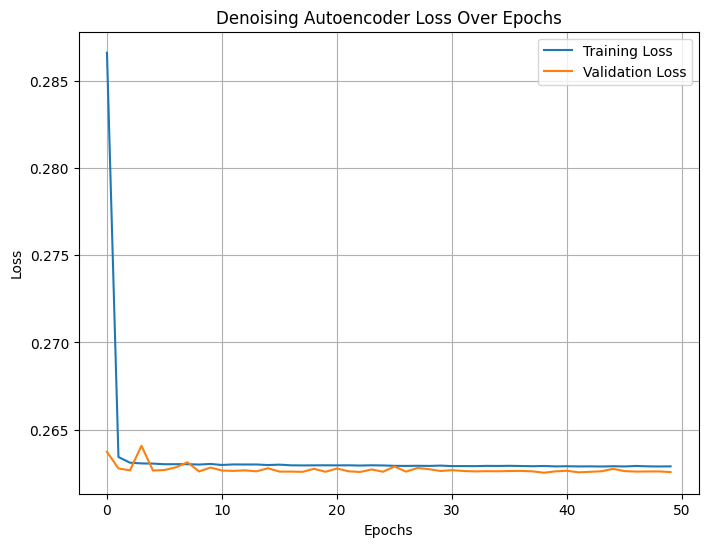

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Denoising Autoencoder Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


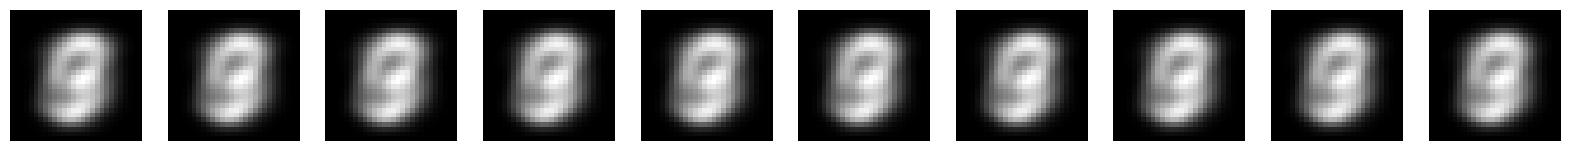

In [ ]:

random_latent_vectors = np.random.normal(size=(10, latent_dim))

generated_images = decoder.predict(random_latent_vectors)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(generated_images[i].squeeze(), cmap="gray")
    axes[i].axis('off')
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


<ipython-input-38-adc0d15f2abb>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_tsne[:, 0], z_tsne[:, 1], cmap='tab10', s=5)


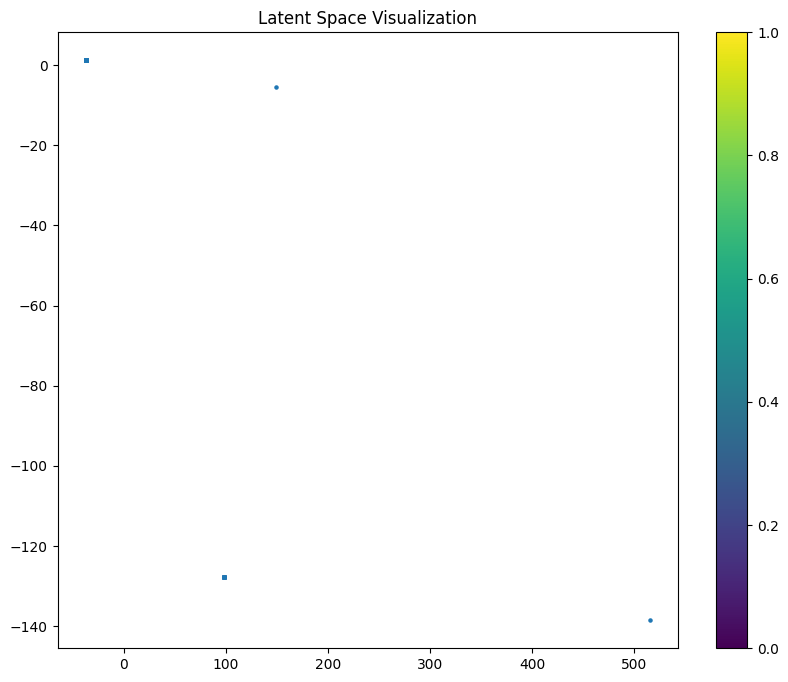

In [ ]:

z_mean_test, _ = encoder.predict(x_test, batch_size=batch_size)

tsne = TSNE(n_components=2, random_state=42)
z_tsne = tsne.fit_transform(z_mean_test)

plt.figure(figsize=(10, 8))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], cmap='tab10', s=5)
plt.colorbar()
plt.title("Latent Space Visualization")
plt.show()


<ipython-input-39-344a4776cfcf>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_tsne[:, 0], z_tsne[:, 1], cmap='tab10', s=5)


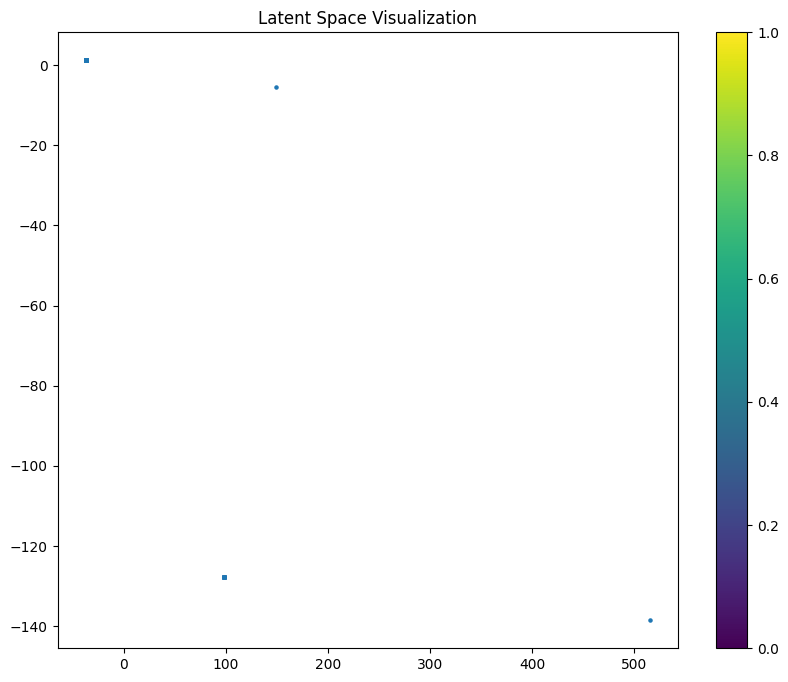

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], cmap='tab10', s=5)
plt.colorbar()
plt.title("Latent Space Visualization")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


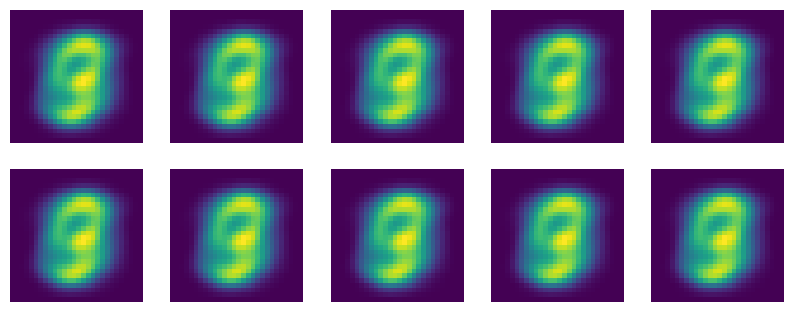

In [ ]:

def generate_images(decoder, n_samples=10):

    random_latent_vectors = np.random.normal(size=(n_samples, latent_dim))

    generated_images = decoder.predict(random_latent_vectors)

    plt.figure(figsize=(10, 10))
    for i in range(n_samples):
        plt.subplot(5, 5, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

generate_images(decoder)
